Download  the data set from the kaggle.

UnZip Command  For file

In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Library  import in the model

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

Create  Generators

In [6]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Normalize the image


In [7]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

create CNN model

In [8]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

Compile the model

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

rum the model

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 81s 109ms/step - loss: 1.7693 - accuracy: 0.5774 - val_loss: 0.6480 - val_accuracy: 0.6246
Epoch 2/10
625/625 [==============================] - 71s 113ms/step - loss: 0.6110 - accuracy: 0.6688 - val_loss: 0.6764 - val_accuracy: 0.6180
Epoch 3/10
625/625 [==============================] - 71s 113ms/step - loss: 0.5251 - accuracy: 0.7355 - val_loss: 0.5068 - val_accuracy: 0.7532
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4587 - accuracy: 0.7861 - val_loss: 0.5479 - val_accuracy: 0.7496
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4067 - accuracy: 0.8166 - val_loss: 0.5406 - val_accuracy: 0.7618
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3440 - accuracy: 0.8451 - val_loss: 0.5549 - val_accuracy: 0.7786
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2877 - accuracy: 0.8719 - val_loss: 0.4921 - val_ac

Polting the Graph


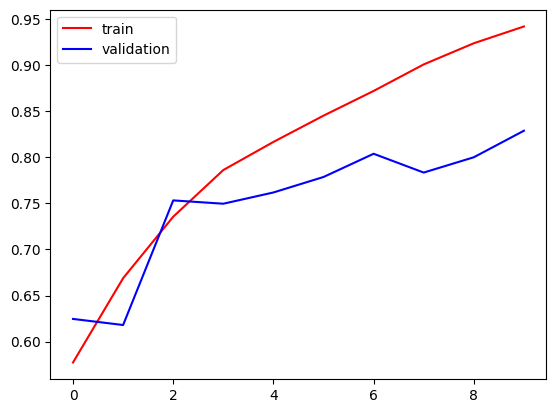

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

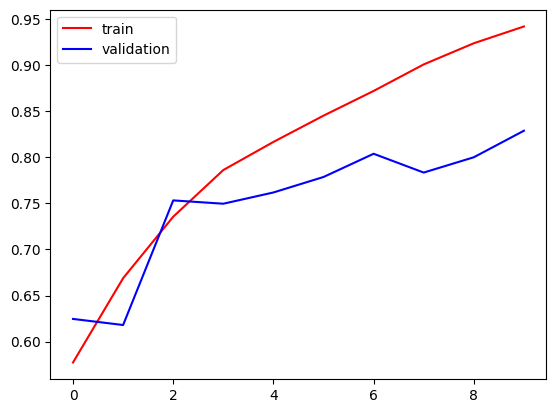

In [13]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

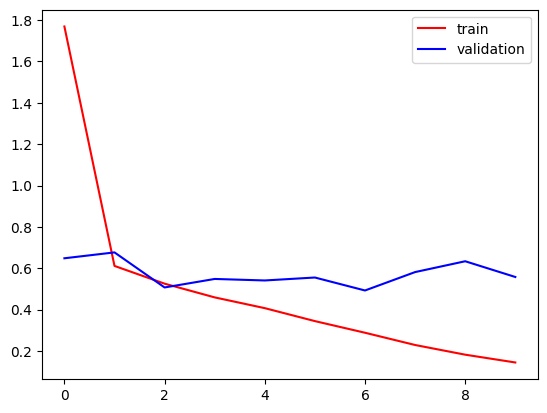

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
import cv2

In [22]:
test_img = cv2.imread('/content/dog.jpg')

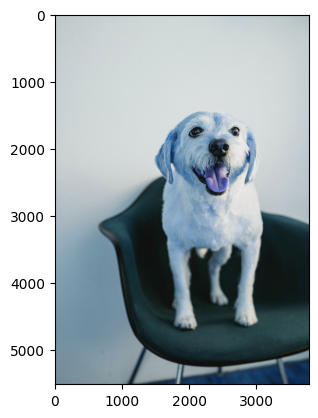

In [23]:
plt.imshow(test_img)

Actually image shape



In [24]:
test_img.shape

(5511, 3784, 3)

resize the image on the bases of the model

In [25]:
test_img = cv2.resize(test_img,(256,256))

reshape the image on the bases of the model


In [26]:
test_input = test_img.reshape((1,256,256,3))

If the output is 1 then it is Dog,
 And if the out put will be  0 then it is cat .


In [27]:
model.predict(test_input)

1/1 [==============================] - 0s 28ms/step


array([[1.]], dtype=float32)